<a href="https://colab.research.google.com/github/AbnerTS/UFMG-PROGRAMACAO-EM-PYTHON/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Curso de Programação em Python

# **Projeto Prático Final** 


------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.

**Execute as duas células abaixo**


In [1]:
# Conectar o Google Drive ao Colab
# Executar sempre que quiser acessar arquivo salvo no Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Criar um diretorio "projetofinal" no drive
# Executar esse comando apenas uma única vez
#%cd /content/drive/MyDrive/Colab Notebooks/
#! mkdir ProjetoFinal


In [2]:
# Alterar o diretório de trabalho para a pasta ProjetoFinal
# e poder acessar algum arquivo lá
%cd /content/drive/MyDrive/Colab Notebooks/ProjetoFinal

/content/drive/MyDrive/Colab Notebooks/ProjetoFinal


In [ ]:
# Baixando o arquivo. 
# Requests é uma biblioteca HTTP para Python: https://docs.python-requests.org/pt_BR/latest/
# Você também pode baixar o arquivo diretamente no seu browser

## Bibliotecas utilizadas
import requests

URL = 'https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv'
r = requests.get(URL, allow_redirects=True)  # Baixando arquivo Cfem.csv
file_name = URL.split('/')[-1]

# Gravando o arquivo em formato binário
with open(file_name, 'wb') as f:
    f.write(r.content)

# Equivalente a fazer:
# f = open(file_name, 'wb')
# f.write(r.content)
# f.close()

In [4]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
  with open(filename, 'r', encoding='ISO-8859-1') as arquivo:
    # criar lista vazia para armazanar todos os dados do arquivo
    dados = []
    
    #linha = arquivo.readline()
    #print(linha)
    
    for line in arquivo:
      dados.append(line.rstrip().replace('","', '";"').replace('"','').split(';'))
      dados[-1][12] = dados[-1][12].replace(',', '.')
      dados[-1][13] = dados[-1][13].replace(',', '.')

  #separar a primeira linha do arquivo para uma lista separada de rotulos
  rotulos = dados.pop(0)
    
  return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############

rotulos, dados = le_dados("Cfem.csv")

print('Rótulos: ', rotulos)
print('Dados da primeira linha: ', dados[0])
#print('Dados da primeira BAUXITA: ', dados[419])
#print('Dados da primeira BAUXITA ERRO: ', dados[97270])
print('Número total de registros: %d' % len(dados))


Rótulos:  ['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 'Quantidade Comercializada', 'Valor Recolhido (CFEM)']
Dados da primeira linha:  ['2002', '6', '', '', 'PF', '***.000.000-**', 'Não Informado', '', '', '', '', '', '', '31']
Número total de registros: 1219475


Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



In [5]:
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

In [6]:

# Plota um gráfico com a série temporal das arrecadacoes totais
# Entrada: lista de tuplas (ano, arrecadacao)
def plot_serie_arrecadacoes(lista):    
    x = []
    y = []
    
    for ano, arrecadacao in lista:
        x.append(str(ano)) 
        y.append(arrecadacao/(10**6)) # Dividindo por 1 milhao para facilitar a representação

    plt.plot(x,y)    

    plt.xlabel('Ano')
    plt.ylabel('Arrecadações (em milhões de reais)')
    plt.title(f'Total de arrecadações do CFEM entre {x[0]} e {x[-1]}')    
    
    plt.xticks(rotation=60)
    plt.grid(True)

    plt.show() 


In [7]:
# Função para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).
def ObterArrecadacao(ano_inicio, ano_fim):
    arrecadacoes = []
    for ano in range(ano_inicio, ano_fim + 1):
        arrecadacao_total_ano = 0
        
        # Iterar em cada registro de gasto
        # A informação das arrecadações está na coluna de rótulos identificada por 'Valor Recolhido (CFEM)'
        index = rotulos.index('Valor Recolhido (CFEM)')
        for registro in dados:
          if registro[0] == str(ano):
            arrecadacao_total_ano += float(registro[index])
                
        arrecadacoes.append((ano, arrecadacao_total_ano))
        
    return arrecadacoes 

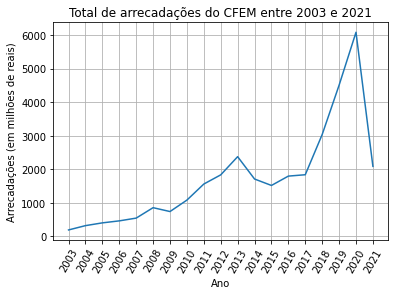

In [8]:
############# BLOCO PRINCIPAL DO PROGRAMA #############    
INICIO = 2003
FIM = 2021
arrecadacoes = ObterArrecadacao(INICIO, FIM)
#print(arrecadacoes)
plot_serie_arrecadacoes(arrecadacoes)


Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

In [9]:
# 3 - Uma função que retorna a extração de um determinado minério por estado e período

def ObterTotalSubstanciaPorEstado(ano_inicio, ano_fim, substancia):
    extracoes_dict = {}
    
    # Iterar em cada registro de qtde
    # A informação do qtde está na coluna de rótulos identificada por 'Quantidade Comercializada'
    index_ano = rotulos.index('Ano de Referencia')
    index_subst = rotulos.index('Substância')
    index_estado = rotulos.index('Uf')
    index_qtde = rotulos.index('Quantidade Comercializada')
    qtde_subst = .0

    for registro in dados:
      if (int(registro[index_ano]) >= ano_inicio and int(registro[index_ano]) <= ano_fim):
        if (registro[index_subst].upper() == substancia) and registro[index_estado] != '':   
          if (registro[index_qtde] == ''): registro[index_qtde] = '0'
          qtde_subst = float(registro[index_qtde])
          extracoes_dict[registro[index_estado]] = extracoes_dict.get(registro[index_estado], 0.0) + qtde_subst
        
    extracoes = []
    for estado, qtde in extracoes_dict.items():
        extracoes.append((estado, qtde))
    return extracoes


In [10]:

# Plota um gráfico de barras que mostra a extração de bauxita por estado e período 
# Entrada: lista de tuplas (Substancia, Qtde)
def PlotarExtracaoPorEstado(extracao_par, ano_inicio, ano_fim, substancia, unidade):
    # Ordena dicionário em ordem decrescente, para começar com o estado com o
    # maior qtde
    estados_ordenados = sorted(extracao_par, key=itemgetter(1), reverse=True)

    valores = []
    nomes = []
    for estado, qtde in estados_ordenados[:20]:
        valores.append(float(qtde)/(10**6)) # Milhoes
        nomes.append(estado)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    
    plt.bar(ind, valores, width=0.65, color='b')
    
    plt.ylabel(f'(em milhões de {unidade})')
    plt.title(f'Extração de {substancia} por estado entre {ano_inicio} e {ano_fim}')
    
    plt.xticks(ind, nomes, rotation=0)
    
    plt.show()


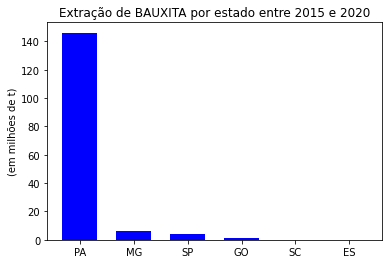

In [11]:

############# BLOCO PRINCIPAL DO PROGRAMA #############

ano_inicio = 2015
ano_fim = 2020
subst = 'BAUXITA'
unidade = 't'
extracao_par = ObterTotalSubstanciaPorEstado(ano_inicio, ano_fim, subst)
#print(extracao_par)

PlotarExtracaoPorEstado(extracao_par, ano_inicio, ano_fim, subst, unidade)

Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

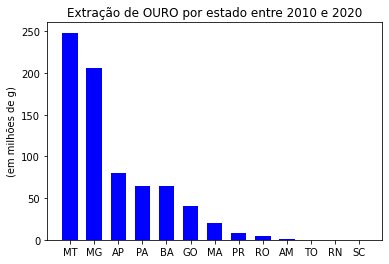

In [12]:
############# BLOCO PRINCIPAL DO PROGRAMA #############

ano_inicio = 2010
ano_fim = 2020
subst = 'OURO'
unidade = 'g'

extracao_par = ObterTotalSubstanciaPorEstado(ano_inicio, ano_fim, subst)
#print(extracao_par)

PlotarExtracaoPorEstado(extracao_par, ano_inicio, ano_fim, subst, unidade)



Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

In [13]:
# Função para obter uma lista com o total de extração por peíodo e substãncia nos estados de Minas Gerais e Pará
def ObterTotalPorSubstanciaPAMG(ano_inicio, ano_fim, substancia):
    totalizacoes = []

    for ano in range(ano_inicio, ano_fim + 1):
        qtde_ano_PA = 0
        qtde_ano_MG = 0
        
        # Iterar em cada registro de gasto
        # A informação das arrecadações está na coluna de rótulos identificada por 'Quantidade Comercializada'
        index = rotulos.index('Quantidade Comercializada')
        index_subst = rotulos.index('Substância')
        index_estado = rotulos.index('Uf')
        for registro in dados:
          if registro[index] != '':
            if registro[0] == str(ano) and registro[index_subst].upper() == substancia:
              if registro[index_estado] == 'PA': qtde_ano_PA += float(registro[index])
              if registro[index_estado] == 'MG': qtde_ano_MG += float(registro[index])
            
                
        totalizacoes.append((ano, qtde_ano_PA, qtde_ano_MG))
        
    return totalizacoes #Exemplo: [(2009, 1000), (2010, 100), (2011, 3000)]

In [14]:

# Plota um gráfico com a série temporal totais
# Entrada: lista de tuplas (ano, qtde)
def plot_serie_totalizacoes(lista, subst):    
    x = []
    y = []
    y1 = []
    
    for ano, qtde_PA, qtde_MG in lista:
        x.append(str(ano)) 
        y.append(qtde_PA/(10**6)) # Dividindo por 1 milhao para facilitar a representação
        y1.append(qtde_MG/(10**6)) # Dividindo por 1 milhao para facilitar a representação

    plt.plot(x,y, color='b')    
    plt.plot(x,y1, color='r')    

    plt.xlabel('Ano')
    plt.ylabel('Quantidade (em milhões de t)')
    plt.title(f'Evolução da extração de {subst} nos estados de MG e PA')    
    plt.legend(['PA','MG'], loc ="lower center")

    plt.xticks(rotation=60)
    plt.grid(True)

    plt.show() 


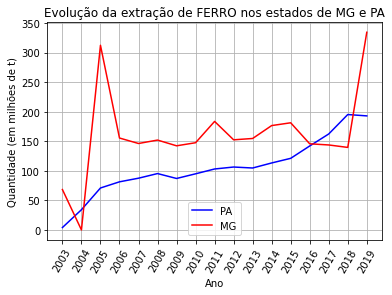

In [15]:
############# TAREFA 4 - BLOCO PRINCIPAL DO PROGRAMA #############    
INICIO = 2003
FIM = 2019
subst = 'FERRO'
totalizacoes = ObterTotalPorSubstanciaPAMG(INICIO, FIM, subst)
#print(totalizacoes)
plot_serie_totalizacoes(totalizacoes, subst)


Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente funções para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


In [16]:
# Função para gerar um gráfico de arrecadação do CFEM por Estados em 2019(milhões de reais).
def ObterArrecadacaoRegiao(ano, estados):
    arrecadacoes_dict = {}
    
    # Iterar em cada registro de qtde
    # A informação do qtde está na coluna de rótulos identificada por 'Quantidade Comercializada'
    index_ano = rotulos.index('Ano de Referencia')
    index_subst = rotulos.index('Substância')
    index_estado = rotulos.index('Uf')
    index_valor = rotulos.index('Valor Recolhido (CFEM)')
    valor = .0
    
    for registro in dados:
      if (int(registro[index_ano]) == ano and registro[index_estado].upper() in (estados.upper())): 
        if (registro[index_subst].upper() != '') and registro[index_estado] != '':   
          if (registro[index_valor] == ''): registro[index_valor] = '0'
          valor = float(registro[index_valor])
          arrecadacoes_dict[registro[index_subst]] = arrecadacoes_dict.get(registro[index_subst], 0.0) + valor

    arrecadacoes = []
    
    for subst, val in sorted(arrecadacoes_dict.items()):
        arrecadacoes.append((val, subst))

    arrecadacoes.sort(reverse=True)

    return arrecadacoes




In [17]:

# Plota um gráfico de pizza
# Entrada: lista de tuplas (Valor Recolhido (CFEM), Substância)
def plot_pie_media(arrecadacoes_par, titulo_par, nr_subst, ano): 
    
    substancias = []
    valores = []
    newVal = .0

    for val, subst in arrecadacoes_par[:nr_subst]:
        valores.append(float(val)) # Milhoes
        substancias.append(subst)
    
    for val, subst in arrecadacoes_par[nr_subst:]:
          newVal += val
    valores.append(float(newVal)) # Milhoes
    substancias.append('OUTROS')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(valores, labels=substancias, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title(f'Arrecadação {titulo_par} em {ano}')
    
    plt.show() 
    


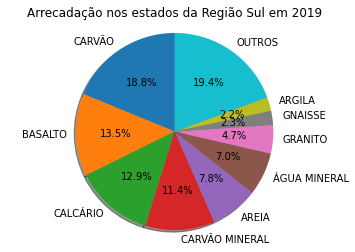

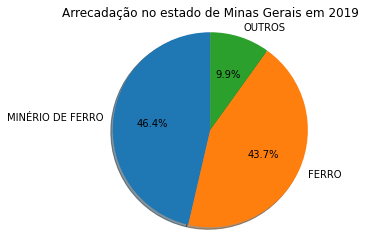

In [18]:
############# TAREFA 5 - BLOCO PRINCIPAL DO PROGRAMA #############    
ANO = 2019
ESTADOS = 'SC, PR, RS'
arr_par = ObterArrecadacaoRegiao(ANO, ESTADOS)
nr_subst = 9
#print(arr_par)
plot_pie_media(arr_par, 'nos estados da Região Sul', nr_subst, ANO)


ANO = 2019
ESTADOS = 'MG'
nr_subst = 2
arr_par = ObterArrecadacaoRegiao(ANO, ESTADOS)
#print(arr_par)
plot_pie_media(arr_par, 'no estado de Minas Gerais', nr_subst, ANO)